# Análise exploratória de dados (EDA)
Este notebook realiza uma análise exploratória completa em um dataset, com foco em identificar padrões, problemas nos dados e obter insights relevantes para futuros modelos ou relatórios.

## Dataset
Link: [https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024/data]

---

### Importando bibliotecas

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
plt.style.use('bmh')

def markdown(txt):
    display(Markdown(txt))

### Importando dataframe

In [5]:
dataframe = pd.read_csv('../data/global_cancer_patients_2015_2024.csv')
dataframe['Total_Risk'] = dataframe[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].mean(axis=1)

### Informações gerais

In [6]:
display(dataframe.head())
display(dataframe.tail())
display(dataframe.describe().T)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Total_Risk
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,5.66
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,3.94
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,4.50
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,3.48


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Total_Risk
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,3.86
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,6.32
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,5.04
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,6.96
49999,PT0049999,22,Male,Pakistan,2023,5.1,9.8,3.2,0.0,0.7,Liver,Stage 0,64023.82,7.4,3.76,3.76


,count,mean,std,min,25%,50%,75%,max
Age,50000.0,54.421540,20.224451,20.00,37.000,54.00,72.00,89.00
Year,50000.0,2019.480520,2.871485,2015.00,2017.000,2019.00,2022.00,2024.00
Genetic_Risk,50000.0,5.001698,2.885773,0.00,2.500,5.00,7.50,10.00
Air_Pollution,50000.0,5.010126,2.888399,0.00,2.500,5.00,7.50,10.00
Alcohol_Use,50000.0,5.010880,2.888769,0.00,2.500,5.00,7.50,10.00
Smoking,50000.0,4.989826,2.881579,0.00,2.500,5.00,7.50,10.00
Obesity_Level,50000.0,4.991176,2.894504,0.00,2.500,5.00,7.50,10.00
Treatment_Cost_USD,50000.0,52467.298239,27363.229379,5000.05,28686.225,52474.31,76232.72,99999.84
Survival_Years,50000.0,5.006462,2.883335,0.00,2.500,5.00,7.50,10.00
Target_Severity_Score,50000.0,4.951207,1.199677,0.90,4.120,4.95,5.78,9.16


## Observações iniciais
- Não existem valores nulos.
- Os valores estão bem balanceados.

---

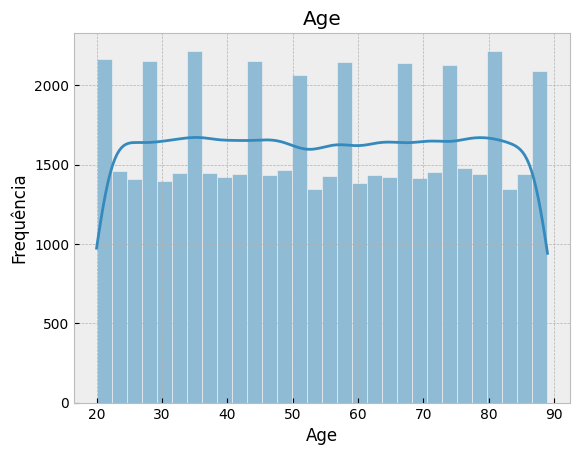

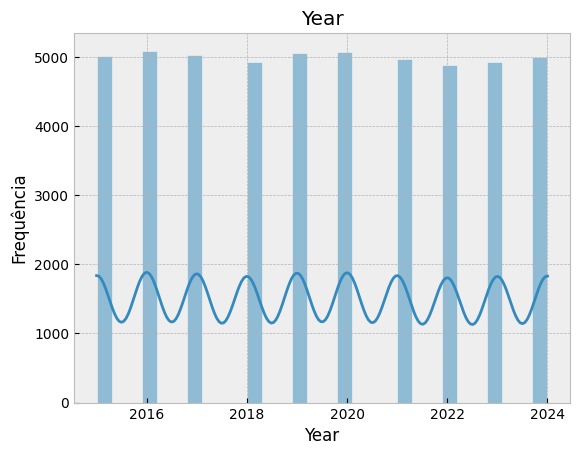

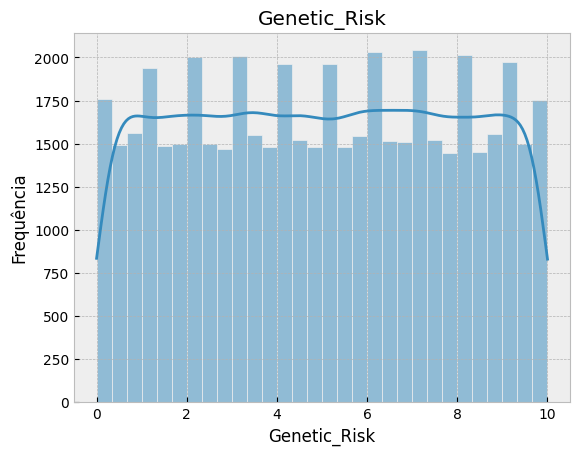

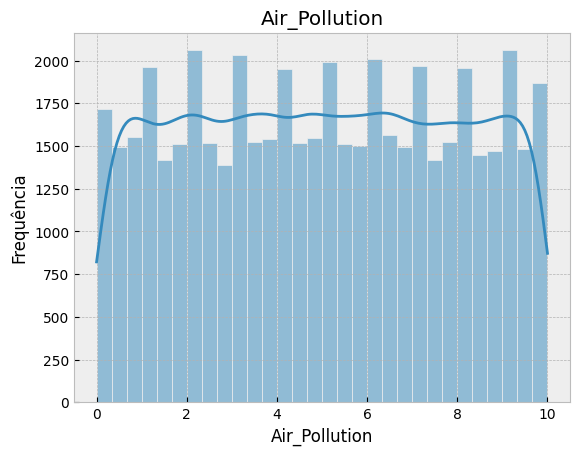

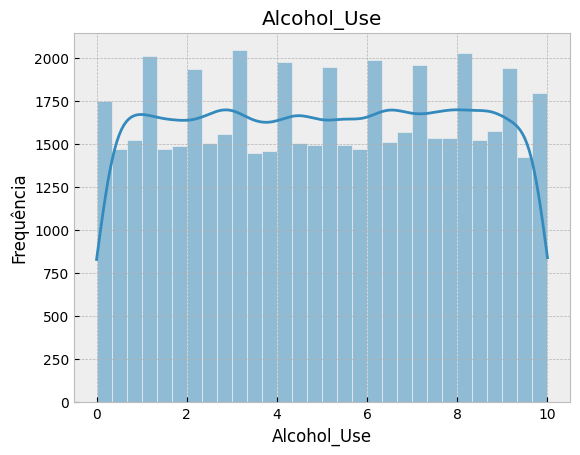

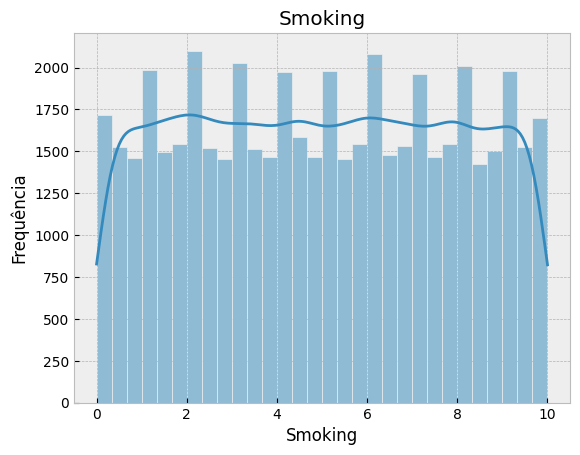

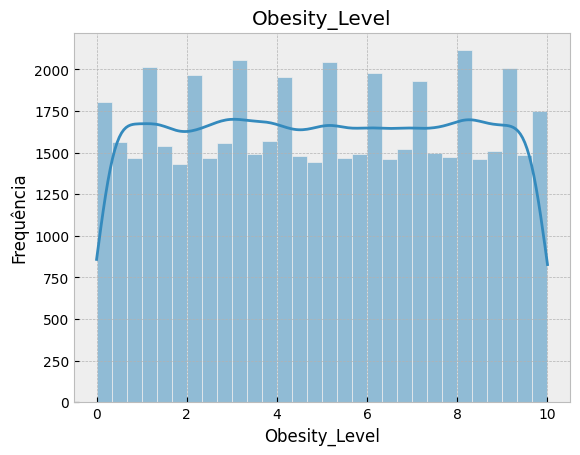

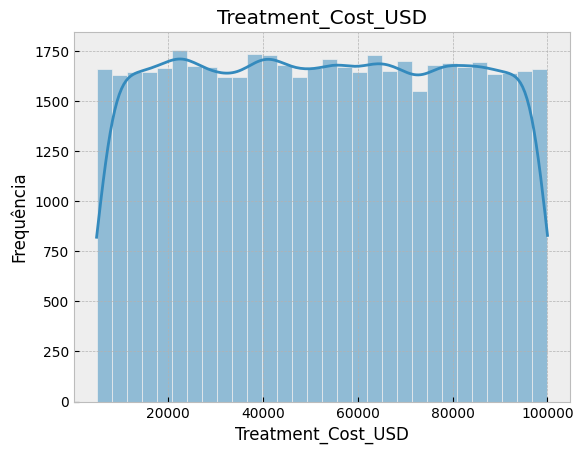

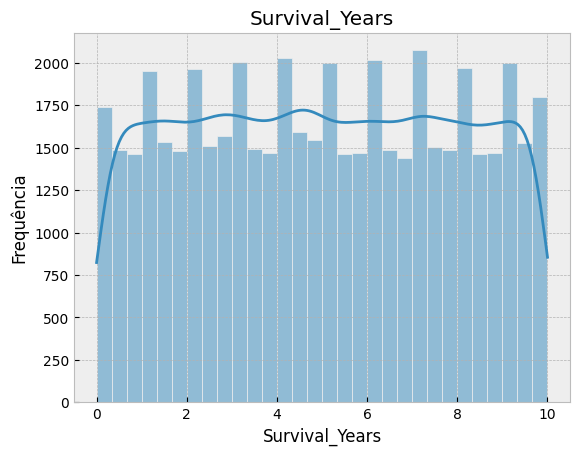

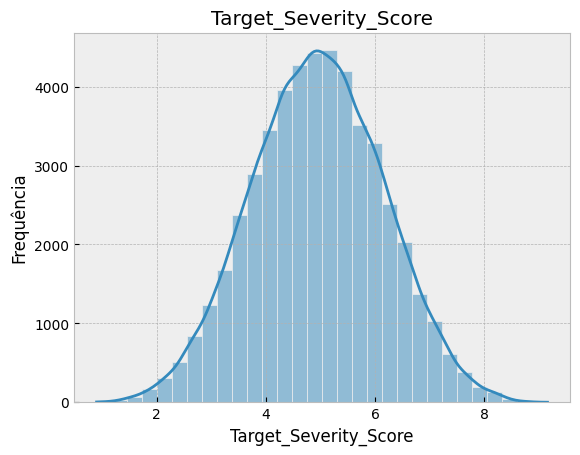

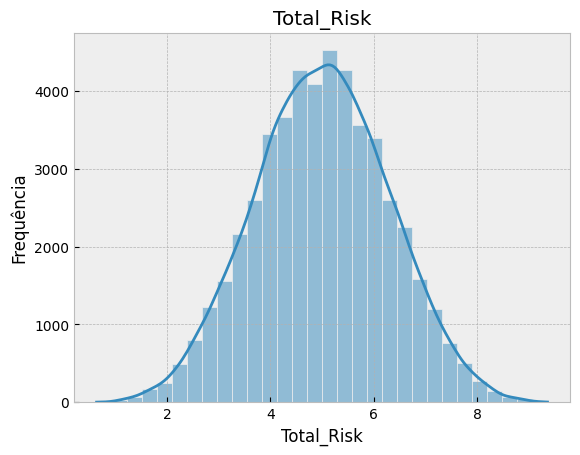

In [125]:
num_cols = dataframe.select_dtypes(include='number').columns

for col in num_cols:
    sns.histplot(dataframe[col], kde=True, bins=30)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

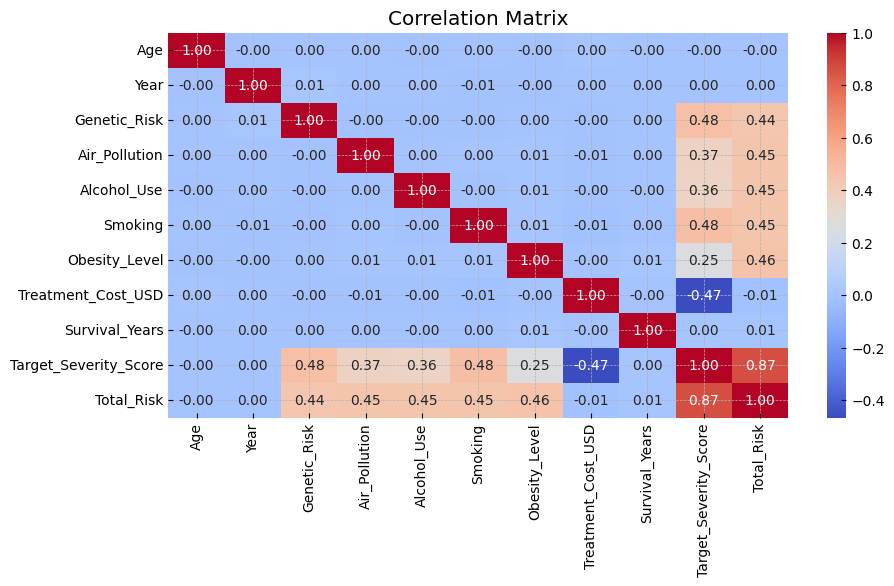

In [103]:
# Correlation
corr = dataframe[num_cols].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Perfil dos pacientes
- Distribuição de idade
- Distribuição de gênero
- Tipos de câncer mais comuns por gênero
- Tipos de câncer por idade
---

### Distribuição de idade

In [127]:
age = dataframe['Age']
markdown(f'- ### Média de idade: {round(age.mean())}')

- ### Média de idade: 54

### Distribuição de gênero

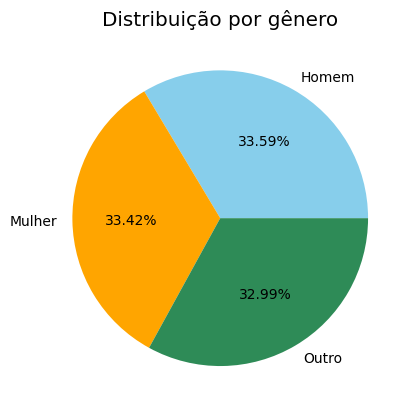

In [129]:
gender_percentage = round(dataframe.value_counts('Gender', normalize=True) * 100, 2)
plt.pie(gender_percentage, labels=['Homem', 'Mulher', 'Outro'], autopct='%.2f%%', colors=['skyblue', 'orange', 'seagreen'])
plt.title('Distribuição por gênero')
plt.show()

### Tipos de câncer mais comuns por gênero

In [106]:
male_dataframe = dataframe.loc[dataframe['Gender'] == 'Male']
male_most_common = male_dataframe.value_counts('Cancer_Type').sort_values(ascending=True) 

In [107]:
female_dataframe = dataframe.loc[dataframe['Gender'] == 'Female']
female_most_common = female_dataframe.value_counts('Cancer_Type')

In [108]:
other_sex_dataframe = dataframe.loc[dataframe['Gender'] == 'Other']
other_gender_most_common = other_sex_dataframe.value_counts('Cancer_Type')

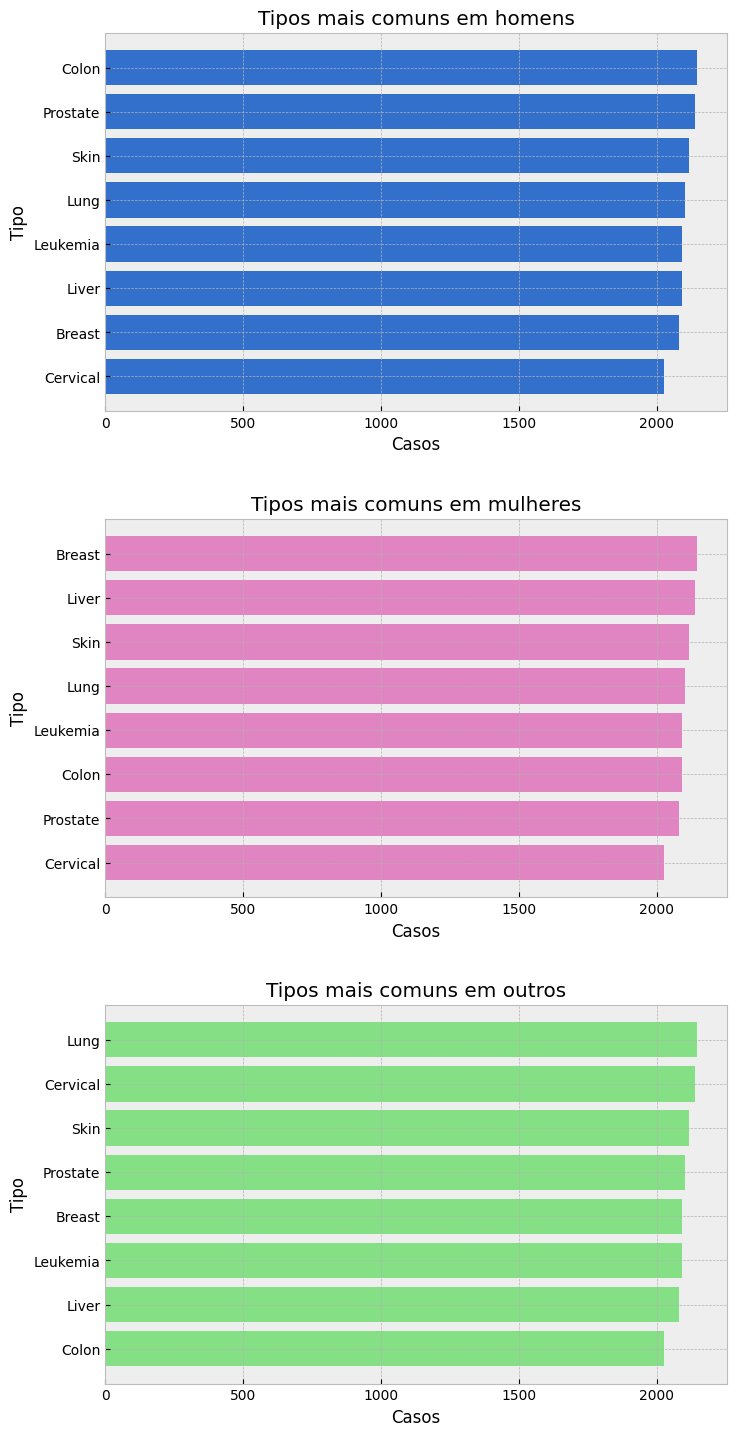

In [131]:
fig, axis = plt.subplots(3, 1, figsize=(8,15))
axis[0].barh(y=male_most_common.index, width=male_most_common.values, color='#3370cc')
axis[0].set_title('Tipos mais comuns em homens')

axis[1].barh(y=female_most_common.index, width=male_most_common.values, color='#e085c2')
axis[1].set_title('Tipos mais comuns em mulheres')

axis[2].barh(y=other_gender_most_common.index, width=male_most_common.values, color='#85e085')
axis[2].set_title('Tipos mais comuns em outros')

for ax in axis:
    ax.set_xlabel('Casos')
    ax.set_ylabel('Tipo')

plt.tight_layout(pad=3.0)
plt.show()

### Tipos de câncer por idade

In [110]:
twenty_to_fourty = dataframe.loc[(dataframe['Age'] >= 20) & (dataframe['Age'] < 40)].value_counts('Cancer_Type')
fourty_to_sixty = dataframe.loc[(dataframe['Age'] >= 40) & (dataframe['Age'] < 60)].value_counts('Cancer_Type')
sixty_older = dataframe.loc[dataframe['Age'] >= 60].value_counts('Cancer_Type')

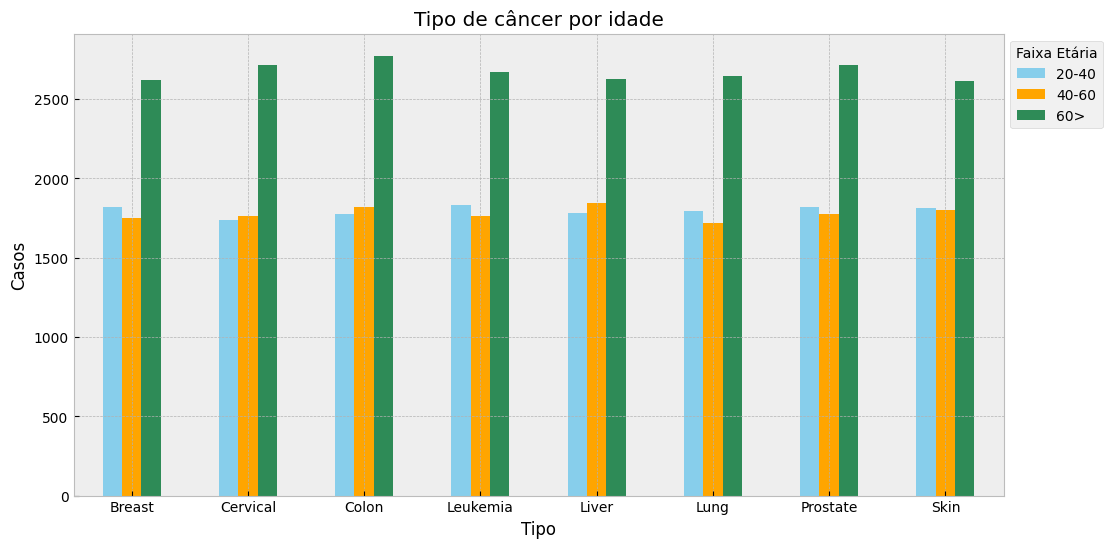

In [133]:
cancer_by_age = pd.DataFrame({
    '20-40': twenty_to_fourty,
    '40-60': fourty_to_sixty,
    '60>': sixty_older,
})

cancer_by_age.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange', 'seagreen'])
plt.title('Tipo de câncer por idade')
plt.ylabel('Casos')
plt.xlabel('Tipo')
plt.xticks(rotation=0)
plt.legend(title='Faixa Etária', loc=2, bbox_to_anchor=(1, 1))
plt.show()

## Análise temporal
- Tipos de caso por ano
- Média de idade por ano
***

### Tipos de caso por ano


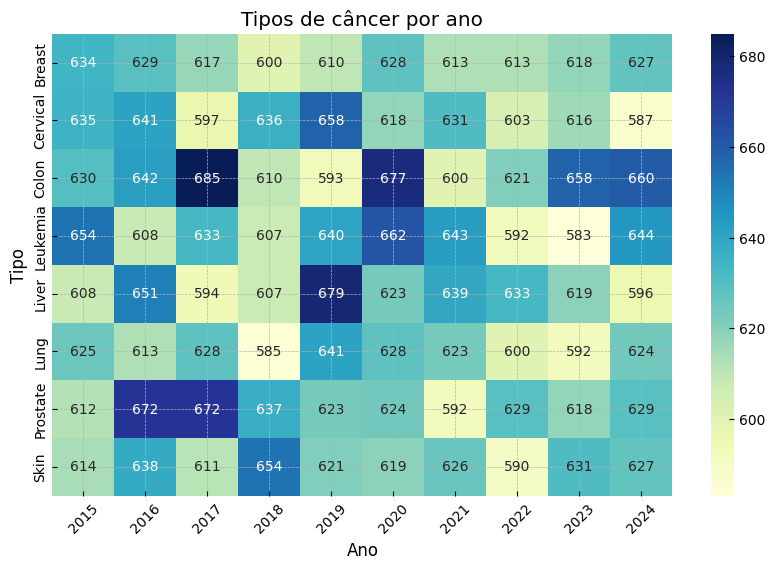

In [138]:
plt.figure(figsize=(10,6))
cancer_year = dataframe.groupby(['Year', 'Cancer_Type']).size().unstack()
sns.heatmap(cancer_year.T, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xticks(rotation=45)
plt.xlabel('Ano')
plt.ylabel('Tipo')
plt.title('Tipos de câncer por ano')
plt.show()

### Média de idade por ano

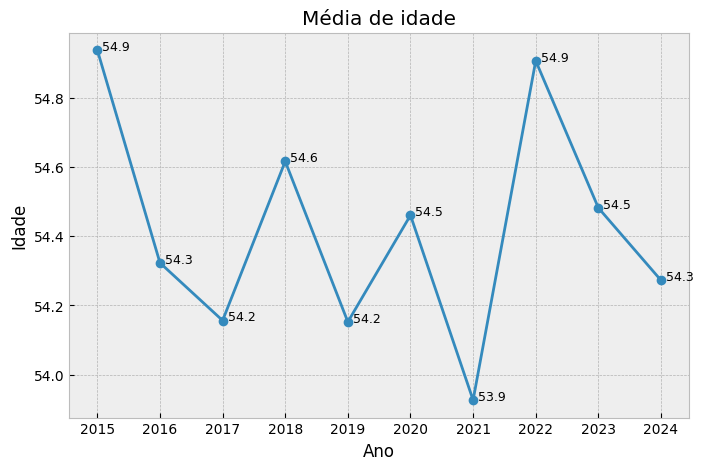

In [139]:
age_mean_year = dataframe[['Year', 'Age']].groupby('Year').mean()
plt.figure(figsize=(8, 5))
plt.plot(age_mean_year, 'o-')

for year, age in age_mean_year.itertuples():
    plt.text(year + 0.3, age, f'{age:.1f}', ha='center', fontsize=9)


plt.xticks(ticks=age_mean_year.index, labels=age_mean_year.index)
plt.xlabel('Ano')
plt.ylabel('Idade')
plt.title('Média de idade')
plt.show()


## Riscos
- Tipos de risco e tipos de câncer mais comuns
- Risco total por país
***


### Tipos de risco e tipos de câncer mais comuns

In [115]:
obesity_level = dataframe[['Cancer_Type', 'Obesity_Level']].groupby('Cancer_Type').mean().sort_values(by='Obesity_Level', ascending=True)

genetic_risk = dataframe[['Cancer_Type', 'Genetic_Risk']].groupby('Cancer_Type').mean().sort_values(by='Genetic_Risk', ascending=True)

air_pollution = dataframe[['Cancer_Type', 'Air_Pollution']].groupby('Cancer_Type').mean().sort_values(by='Air_Pollution', ascending=True)

alcohol_use = dataframe[['Cancer_Type', 'Alcohol_Use']].groupby('Cancer_Type').mean().sort_values(by='Alcohol_Use', ascending=True)

smoking = dataframe[['Cancer_Type', 'Smoking']].groupby('Cancer_Type').mean().sort_values(by='Smoking', ascending=True)

total_risk = dataframe[['Cancer_Type', 'Total_Risk']].groupby('Cancer_Type').mean().sort_values(by='Total_Risk', ascending=True)

risk_list = {'Obesity_Level':obesity_level, 
             'Genetic_Risk':genetic_risk, 
             'Air_Pollution': air_pollution, 
             'Alcohol_Use': alcohol_use, 
             'Smoking': smoking, 
             'Total_Risk': total_risk,
            }

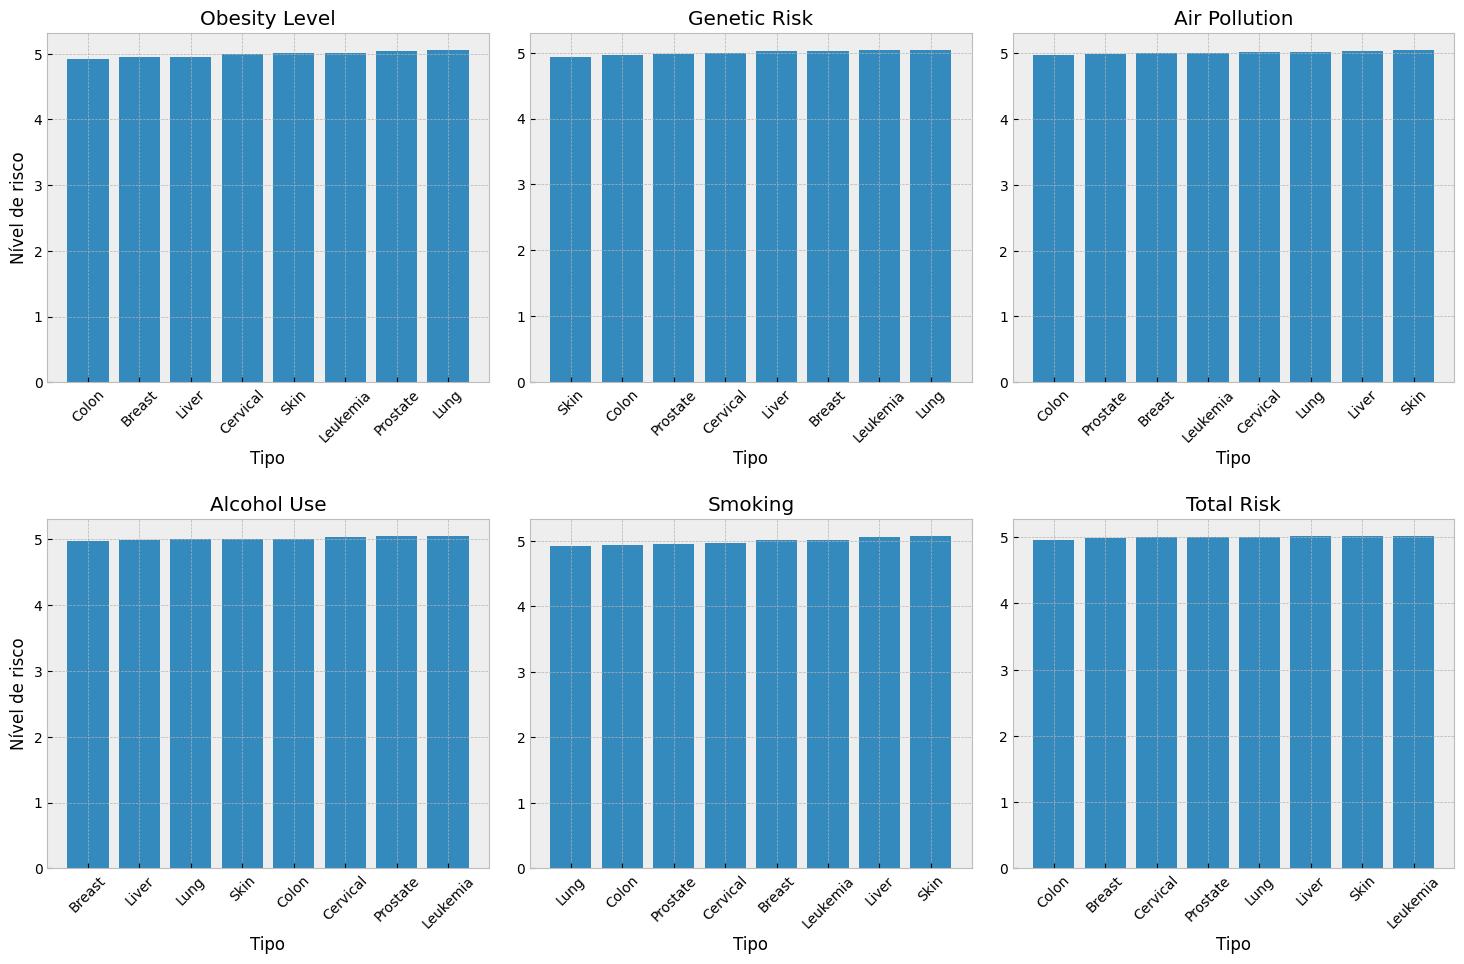

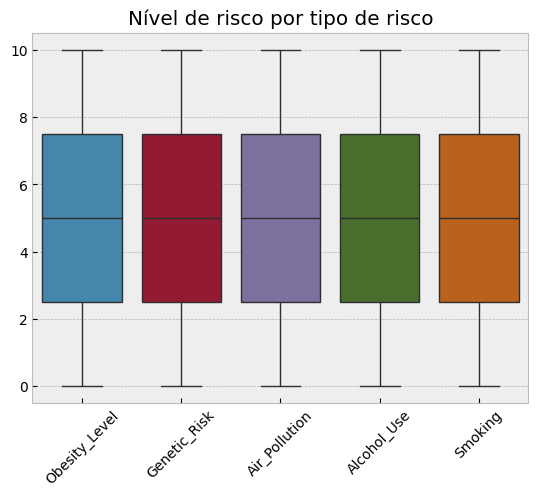

In [141]:
fig, axis = plt.subplots(2,3, figsize=(15,10))
axis = axis.flatten()


for i, (risk_title, risk_df) in enumerate(risk_list.items()):
    axis[i].bar(risk_df.index, risk_df[risk_title])
    axis[i].tick_params(axis='x', rotation=45)
    axis[i].set_title(str(risk_title).replace('_', ' '))
    axis[i].set_xlabel('Tipo')
    if i == 0 or i == 3:
        axis[i].set_ylabel('Nível de risco')
    
plt.tight_layout(pad=2.0)

plt.figure()
sns.boxplot(data=[dataframe['Obesity_Level'], 
                  dataframe['Genetic_Risk'], 
                  dataframe['Air_Pollution'], 
                  dataframe['Alcohol_Use'], 
                  dataframe['Smoking'],
                 ])
plt.xticks(rotation=45)
plt.title('Nível de risco por tipo de risco')
plt.show()

### Risco total por país

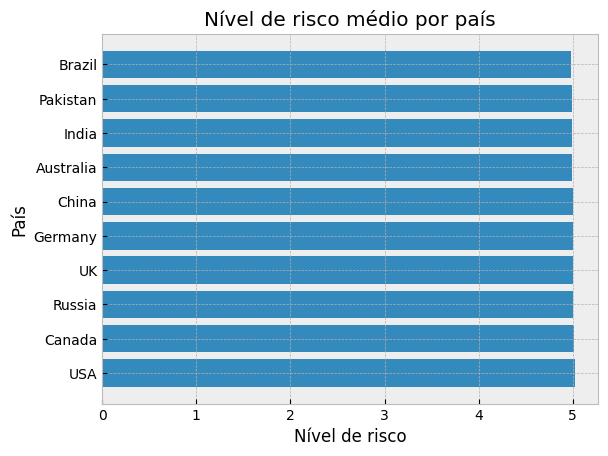

In [142]:

risk_per_country = dataframe[['Country_Region', 'Total_Risk',]].groupby('Country_Region').mean().sort_values(by='Total_Risk', ascending=False)
plt.barh(y=risk_per_country.index, width=risk_per_country['Total_Risk'])
plt.xlabel('Nível de risco')
plt.ylabel('País')
plt.title('Nível de risco médio por país')
plt.show()

#### Observações

Ao analisar os gráficos de barras e o boxplot acima, fica claro que os valores de risco estão altamente equilibrados entre os diferentes tipos de risco. Os subplots mostram distribuições visualmente semelhantes, com pouca ou nenhuma variação significativa entre os tipos de câncer.

No boxplot, **todos os tipos de risco exibem a mesma faixa de valores**, o que sugere níveis artificialmente padronizados ou uma falta de variabilidade real nos dados. Isso pode indicar normalização, valores simulados ou simplesmente que não há uma distinção forte entre as categorias.


## Custos
- Custo por ano
- Custo por país
- Custo por tipo
***

#### Estágio zero

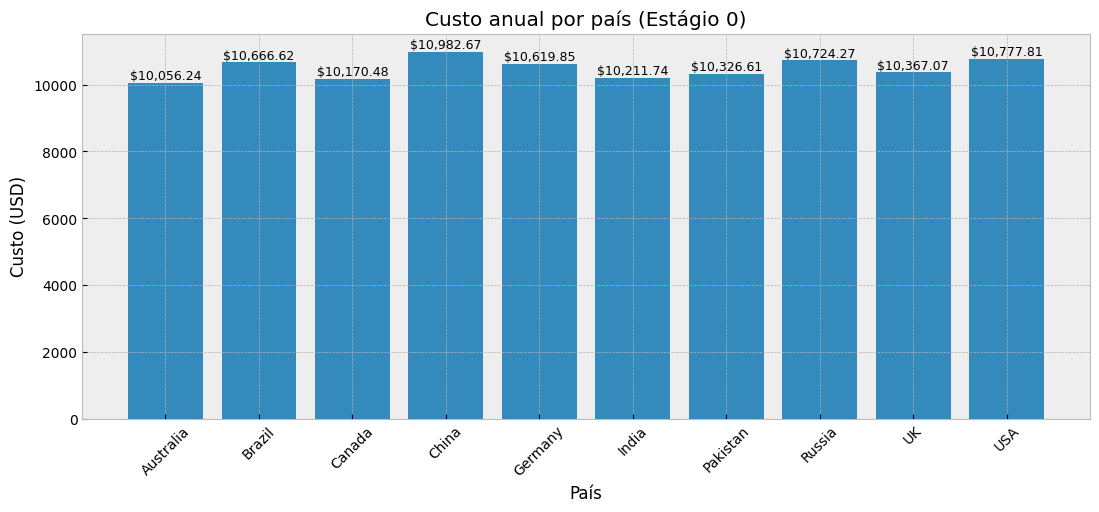

In [143]:
stage_zero = dataframe[dataframe['Cancer_Stage'] == 'Stage 0']
stage_zero = stage_zero[['Cancer_Type', 'Country_Region', 'Survival_Years', 'Treatment_Cost_USD',]]

stage_zero_country = stage_zero[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_zero_country['Cost_Per_Year'] = round(stage_zero_country['Treatment_Cost_USD'] / stage_zero_country['Survival_Years'], 2)

stc0 = stage_zero_country.reset_index()[['Country_Region', 'Treatment_Cost_USD']]
stc0.rename(columns={'Treatment_Cost_USD': 'Stage 0'}, inplace=True)

stage_zero_type = stage_zero[['Cancer_Type', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Cancer_Type').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_zero_type['Cost_Per_Year'] = round(stage_zero_type['Treatment_Cost_USD'] / stage_zero_type['Survival_Years'], 2)

stt0 = stage_zero_type.reset_index()[['Cancer_Type', 'Treatment_Cost_USD']]
stt0.rename(columns={'Treatment_Cost_USD': 'Stage 0'}, inplace=True)

stage_zero = stage_zero[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean()
stage_zero['Cost_Per_Year_USD'] = round(stage_zero['Treatment_Cost_USD'] / stage_zero['Survival_Years'], 2)

plt.figure(figsize=(13,5))
plt.bar(stage_zero.index, stage_zero['Cost_Per_Year_USD'])
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Custo (USD)')
plt.title('Custo anual por país (Estágio 0)')
for row in stage_zero.itertuples():
    formated = str(row[3])
    if row[3] > 10000:
        formated = f'${formated[0:2]},{formated[2:]}'
    else:
        formated = f'${formated[0:1]},{formated[1:]}'
    plt.text(row[0], row[3] + 100, f'{formated}', ha='center', fontsize=9)
plt.show()

#### Estágio um

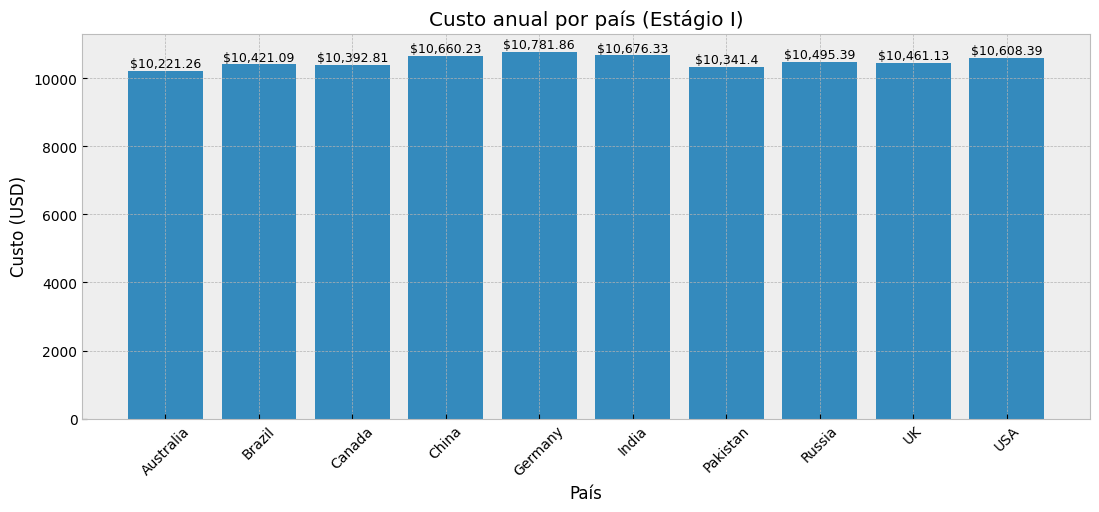

In [144]:
stage_one = dataframe[dataframe['Cancer_Stage'] == 'Stage I']
stage_one = stage_one[['Cancer_Type', 'Country_Region', 'Survival_Years', 'Treatment_Cost_USD',]]

stage_one_country = stage_one[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_one_country['Cost_Per_Year'] = round(stage_one_country['Treatment_Cost_USD'] / stage_one_country['Survival_Years'], 2)

stc1 = stage_one_country.reset_index()[['Country_Region', 'Treatment_Cost_USD']]
stc1.rename(columns={'Treatment_Cost_USD': 'Stage I'}, inplace=True)

stage_one_type = stage_one[['Cancer_Type', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Cancer_Type').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_one_type['Cost_Per_Year'] = round(stage_one_type['Treatment_Cost_USD'] / stage_one_type['Survival_Years'], 2)

stt1 = stage_one_type.reset_index()[['Cancer_Type', 'Treatment_Cost_USD']]
stt1.rename(columns={'Treatment_Cost_USD': 'Stage I'}, inplace=True)

stage_one = stage_one[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean()
stage_one['Cost_Per_Year_USD'] = round(stage_one['Treatment_Cost_USD'] / stage_one['Survival_Years'], 2)
plt.figure(figsize=(13,5))
plt.bar(stage_one.index, stage_one['Cost_Per_Year_USD'])
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Custo (USD)')
plt.title('Custo anual por país (Estágio I)')
for row in stage_one.itertuples():
    formated = str(row[3])
    if row[3] > 10000:
        formated = f'${formated[0:2]},{formated[2:]}'
    else:
        formated = f'${formated[0:1]},{formated[1:]}'
    plt.text(row[0], row[3] + 100, f'{formated}', ha='center', fontsize=9)
plt.show()

#### Estágio dois

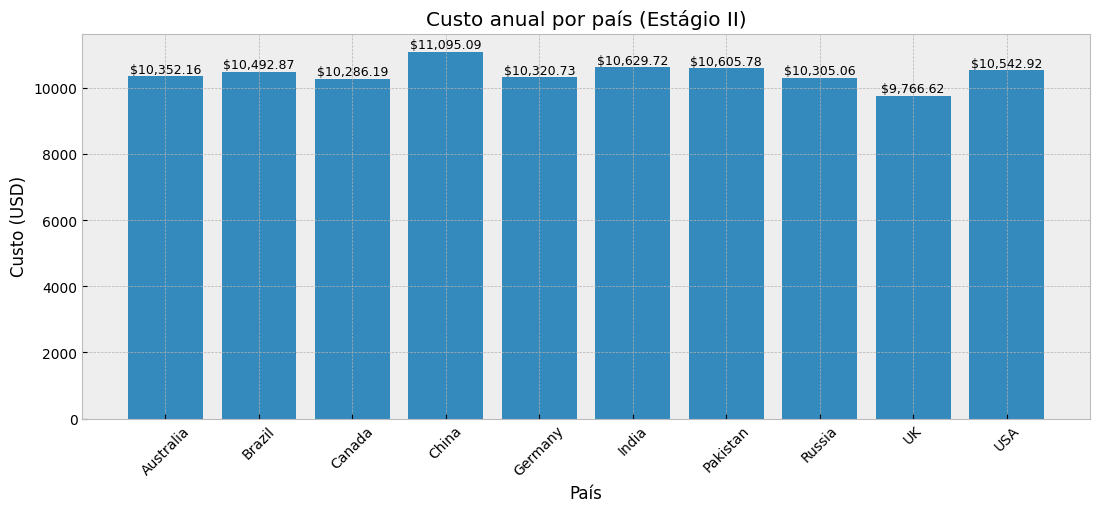

In [145]:
stage_two = dataframe[dataframe['Cancer_Stage'] == 'Stage II']
stage_two = stage_two[['Cancer_Type', 'Country_Region', 'Survival_Years', 'Treatment_Cost_USD',]]

stage_two_country = stage_two[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_two_country['Cost_Per_Year'] = round(stage_two_country['Treatment_Cost_USD'] / stage_two_country['Survival_Years'], 2)

stc2 = stage_two_country.reset_index()[['Country_Region', 'Treatment_Cost_USD']]
stc2.rename(columns={'Treatment_Cost_USD': 'Stage II'}, inplace=True)

stage_two_type = stage_two[['Cancer_Type', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Cancer_Type').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_two_type['Cost_Per_Year'] = round(stage_two_type['Treatment_Cost_USD'] / stage_two_type['Survival_Years'], 2)

stt2 = stage_two_type.reset_index()[['Cancer_Type', 'Treatment_Cost_USD']]
stt2.rename(columns={'Treatment_Cost_USD': 'Stage II'}, inplace=True)

stage_two = stage_two[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean()
stage_two['Cost_Per_Year_USD'] = round(stage_two['Treatment_Cost_USD'] / stage_two['Survival_Years'], 2)

plt.figure(figsize=(13,5))
plt.bar(stage_two.index, stage_two['Cost_Per_Year_USD'])
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Custo (USD)')
plt.title('Custo anual por país (Estágio II)')
for row in stage_two.itertuples():
    formated = str(row[3])
    if row[3] > 10000:
        formated = f'${formated[0:2]},{formated[2:]}'
    else:
        formated = f'${formated[0:1]},{formated[1:]}'
    plt.text(row[0], row[3] + 100, f'{formated}', ha='center', fontsize=9)
plt.show()

#### Estágio três

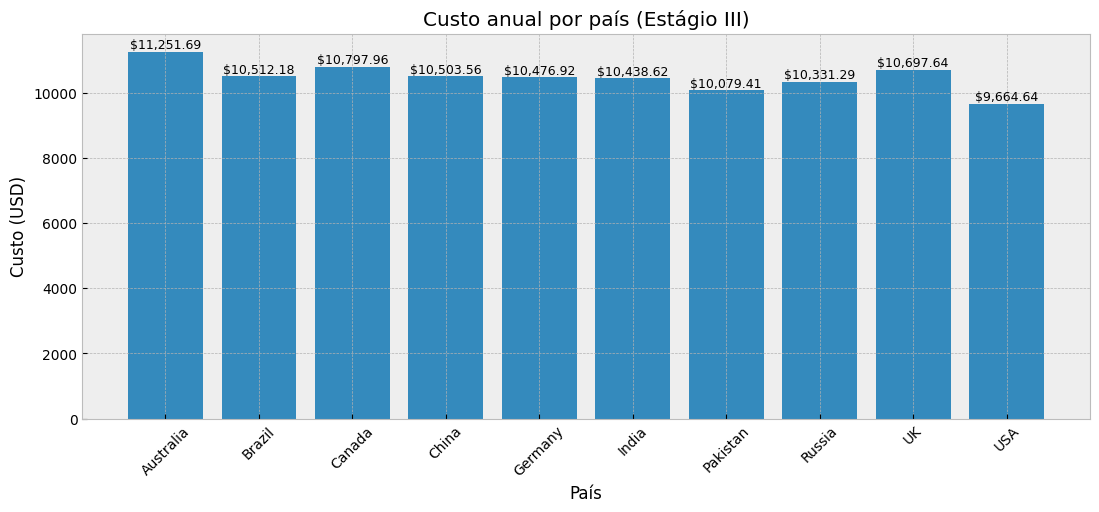

In [146]:
stage_three = dataframe[dataframe['Cancer_Stage'] == 'Stage III']
stage_three = stage_three[['Cancer_Type', 'Country_Region', 'Survival_Years', 'Treatment_Cost_USD',]]

stage_three_country = stage_three[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_three_country['Cost_Per_Year'] = round(stage_three_country['Treatment_Cost_USD'] / stage_three_country['Survival_Years'], 2)

stc3 = stage_three_country.reset_index()[['Country_Region', 'Treatment_Cost_USD']]
stc3.rename(columns={'Treatment_Cost_USD': 'Stage III'}, inplace=True)

stage_three_type = stage_three[['Cancer_Type', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Cancer_Type').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_three_type['Cost_Per_Year'] = round(stage_three_type['Treatment_Cost_USD'] / stage_three_type['Survival_Years'], 2)

stt3 = stage_three_type.reset_index()[['Cancer_Type', 'Treatment_Cost_USD']]
stt3.rename(columns={'Treatment_Cost_USD': 'Stage III'}, inplace=True)

stage_three = stage_three[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean()
stage_three['Cost_Per_Year_USD'] = round(stage_three['Treatment_Cost_USD'] / stage_three['Survival_Years'], 2)

plt.figure(figsize=(13,5))
plt.bar(stage_three.index, stage_three['Cost_Per_Year_USD'])
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Custo (USD)')
plt.title('Custo anual por país (Estágio III)')
for row in stage_three.itertuples():
    formated = str(row[3])
    if row[3] > 10000:
        formated = f'${formated[0:2]},{formated[2:]}'
    else:
        formated = f'${formated[0:1]},{formated[1:]}'
    plt.text(row[0], row[3] + 100, f'{formated}', ha='center', fontsize=9)
plt.show()

#### Estágio quatro

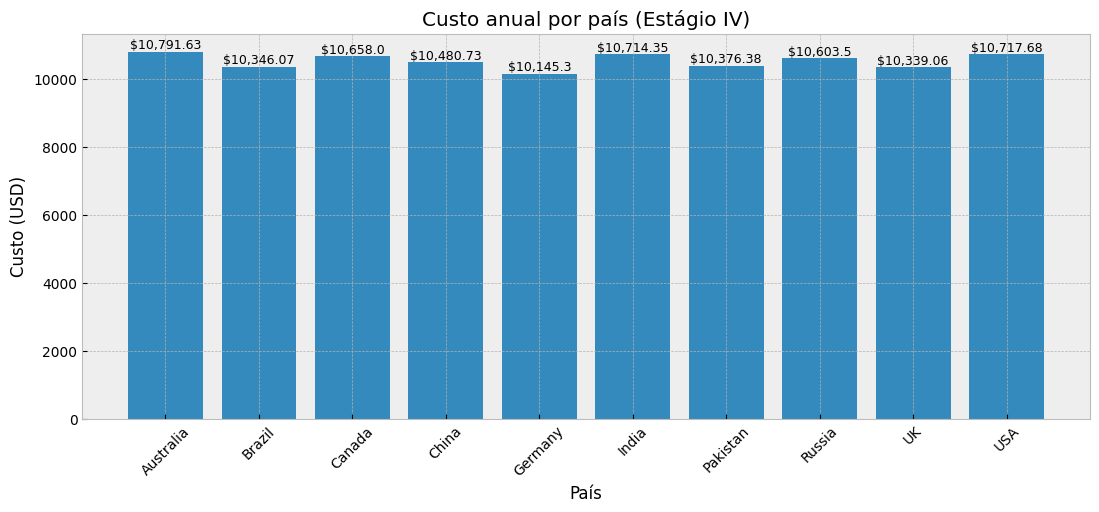

In [147]:
stage_four = dataframe[dataframe['Cancer_Stage'] == 'Stage IV']
stage_four = stage_four[['Cancer_Type', 'Country_Region', 'Survival_Years', 'Treatment_Cost_USD',]]

stage_four_country = stage_four[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_four_country['Cost_Per_Year'] = round(stage_four_country['Treatment_Cost_USD'] / stage_four_country['Survival_Years'], 2)

stage_four_type = stage_four[['Cancer_Type', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Cancer_Type').mean().sort_values('Treatment_Cost_USD', ascending=True)
stage_four_type['Cost_Per_Year'] = round(stage_four_type['Treatment_Cost_USD'] / stage_four_type['Survival_Years'], 2)

stc4 = stage_four_country.reset_index()[['Country_Region', 'Treatment_Cost_USD']]
stc4.rename(columns={'Treatment_Cost_USD': 'Stage IV'}, inplace=True)

stt4 = stage_four_type.reset_index()[['Cancer_Type', 'Treatment_Cost_USD']]
stt4.rename(columns={'Treatment_Cost_USD': 'Stage IV'}, inplace=True)

stage_four = stage_four[['Country_Region', 'Survival_Years', 'Treatment_Cost_USD']].groupby('Country_Region').mean()
stage_four['Cost_Per_Year_USD'] = round(stage_four['Treatment_Cost_USD'] / stage_four['Survival_Years'], 2)

plt.figure(figsize=(13,5))
plt.bar(stage_four.index, stage_four['Cost_Per_Year_USD'])
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Custo (USD)')
plt.title('Custo anual por país (Estágio IV)')
for row in stage_four.itertuples():
    formated = str(row[3])
    if row[3] > 10000:
        formated = f'${formated[0:2]},{formated[2:]}'
    else:
        formated = f'${formated[0:1]},{formated[1:]}'
    plt.text(row[0], row[3] + 100, f'{formated}', ha='center', fontsize=9)
plt.show()

#### Gerando gráficos

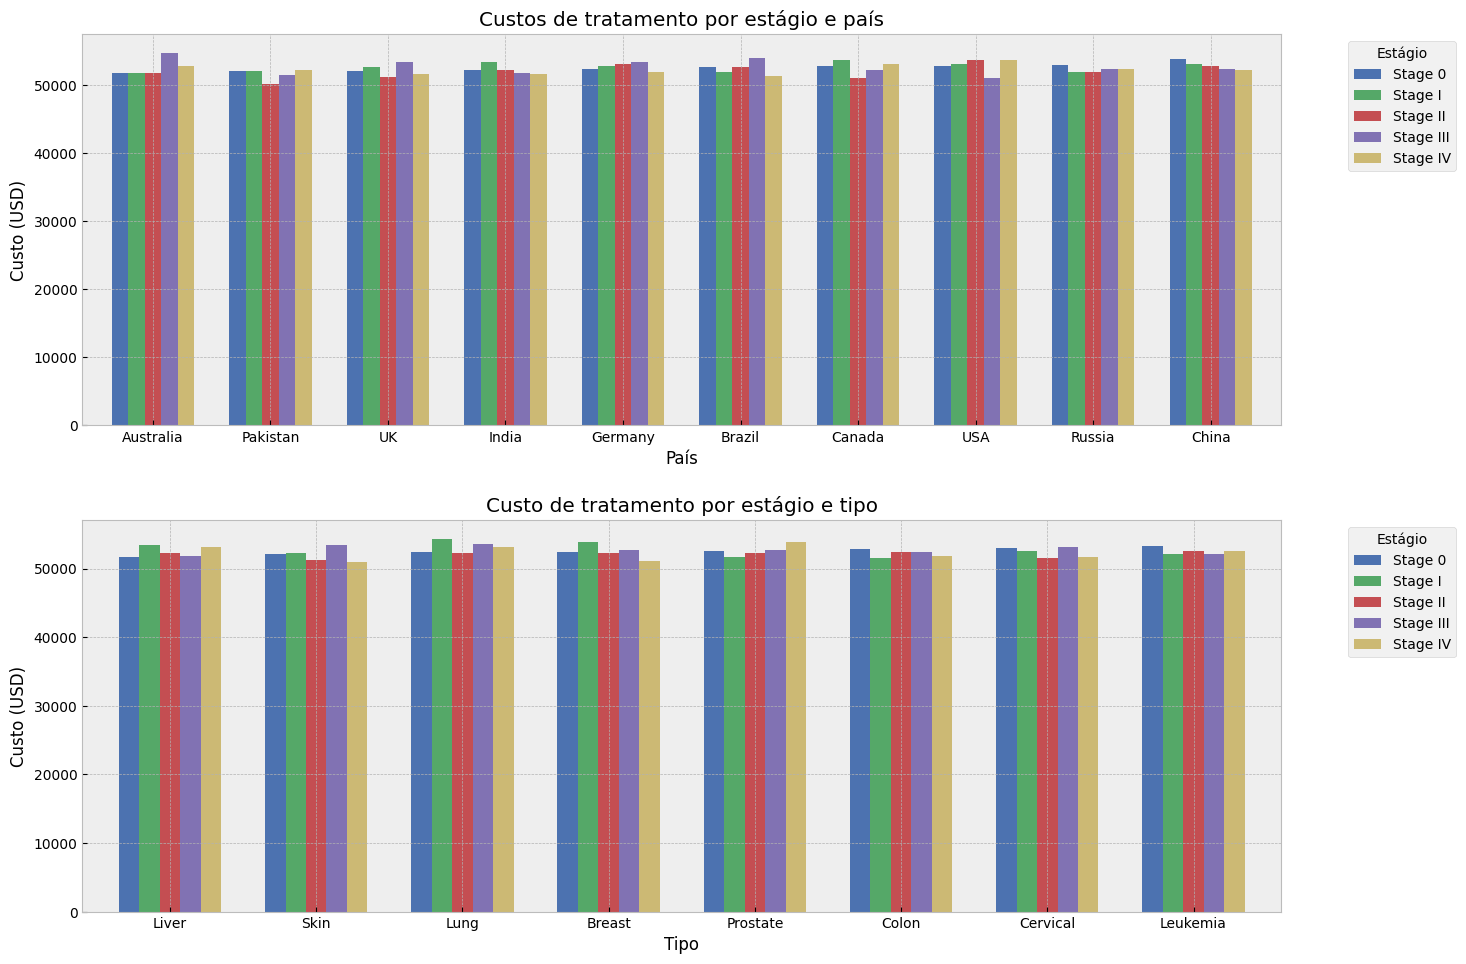

In [149]:
stc_merged = stc0.merge(stc1, on='Country_Region').merge(stc2, on='Country_Region').merge(stc3, on='Country_Region').merge(stc4, on='Country_Region')

stt_merged = stt0.merge(stt1, on='Cancer_Type').merge(stt2, on='Cancer_Type').merge(stt3, on='Cancer_Type').merge(stt4, on='Cancer_Type')
fig, axis = plt.subplots(2,1, figsize=(15,10))
stc_merged.set_index('Country_Region').plot(kind='bar', ax=axis[0], width=0.7, color = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974'])
axis[0].set_title('Custos de tratamento por estágio e país')
axis[0].set_ylabel('Custo (USD)')
axis[0].set_xlabel('País')
axis[0].tick_params(axis='x', rotation=0)
axis[0].legend(title='Estágio', bbox_to_anchor=(1.05, 1), loc='upper left')

stt_merged.set_index('Cancer_Type').plot(kind='bar', ax=axis[1], width=0.7, color = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974'])
axis[1].set_title('Treatment Costs by Stage and Type')
axis[1].set_title('Custo de tratamento por estágio e tipo')
axis[1].set_ylabel('Custo (USD)')
axis[1].set_xlabel('Tipo')
axis[1].tick_params(axis='x', rotation=0)
axis[1].legend(title='Estágio', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=2.0)
plt.show()